In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv("city_day.csv.zip")
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [ ]:
df.isna().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [ ]:
df['PM2.5'].fillna(method = 'bfill',inplace = True )
df['PM10'].fillna(method = 'bfill',inplace = True )
df['NO'].fillna(method = 'ffill',inplace = True )
df['NO2'].fillna(method = 'ffill',inplace = True )
df['NOx'].fillna(method = 'ffill',inplace = True )
df['NH3'].fillna(method = 'bfill',inplace = True )
df['CO'].fillna(method = 'ffill',inplace = True )
df['SO2'].fillna(method = 'ffill',inplace = True )
df['O3'].fillna(method = 'ffill',inplace = True )
df['Benzene'].fillna(method = 'ffill',inplace = True )
df['Toluene'].fillna(method = 'ffill',inplace = True )
df['Xylene'].fillna(method = 'ffill',inplace = True )
df['AQI'].fillna(method = 'bfill',inplace = True )
df['AQI_Bucket'].fillna(method = 'bfill',inplace = True )

In [ ]:
df.isna().sum()

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [ ]:
df["year"]=df['Date'].apply(lambda x:x.split("-")[0])
df["Month"]=df['Date'].apply(lambda x:x.split("-")[1])
df["day"]=df['Date'].apply(lambda x:x.split("-")[2])

In [ ]:
print(f'Data available from: {df.Date.min()} to {df.Date.max()}')

Data available from: 2015-01-01 to 2020-07-01


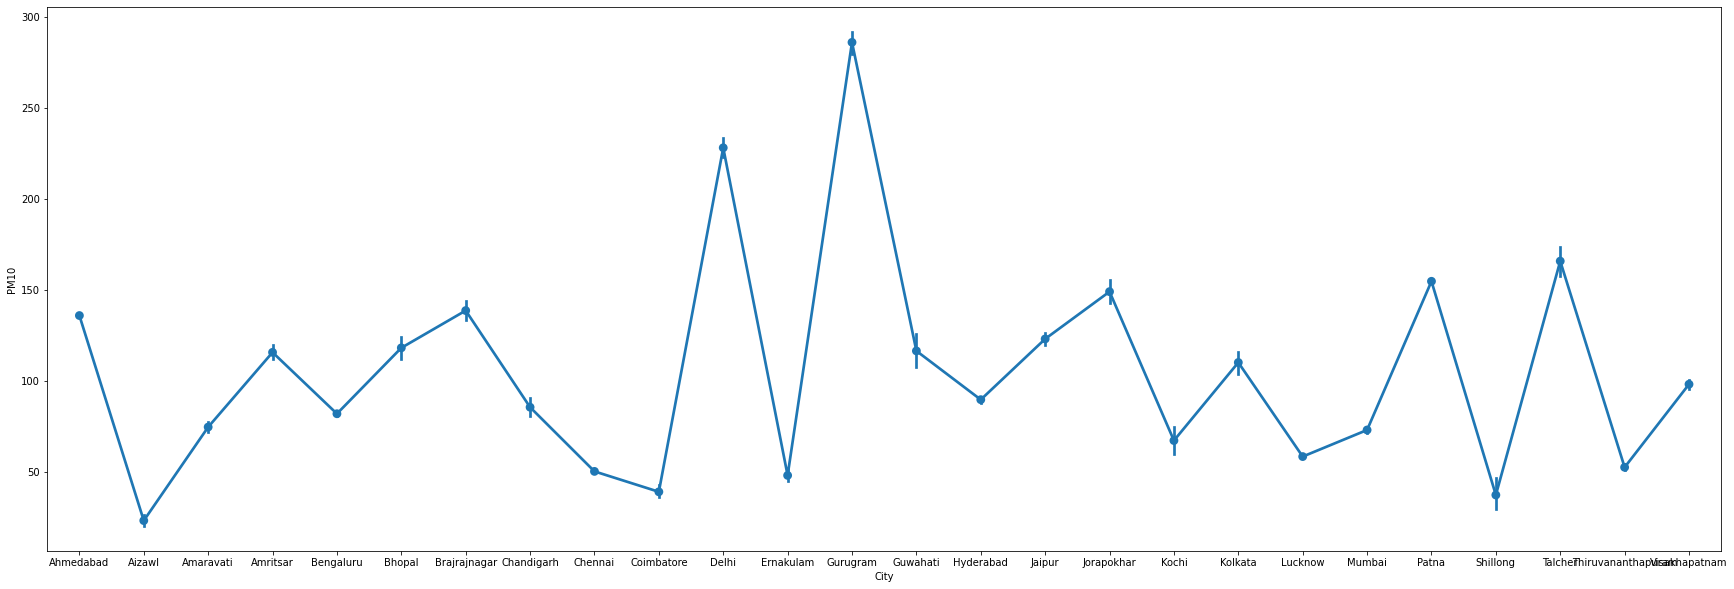

In [ ]:
plt.figure(figsize = (30,10))

sns.pointplot(x = 'City', y = 'PM10', data = df)

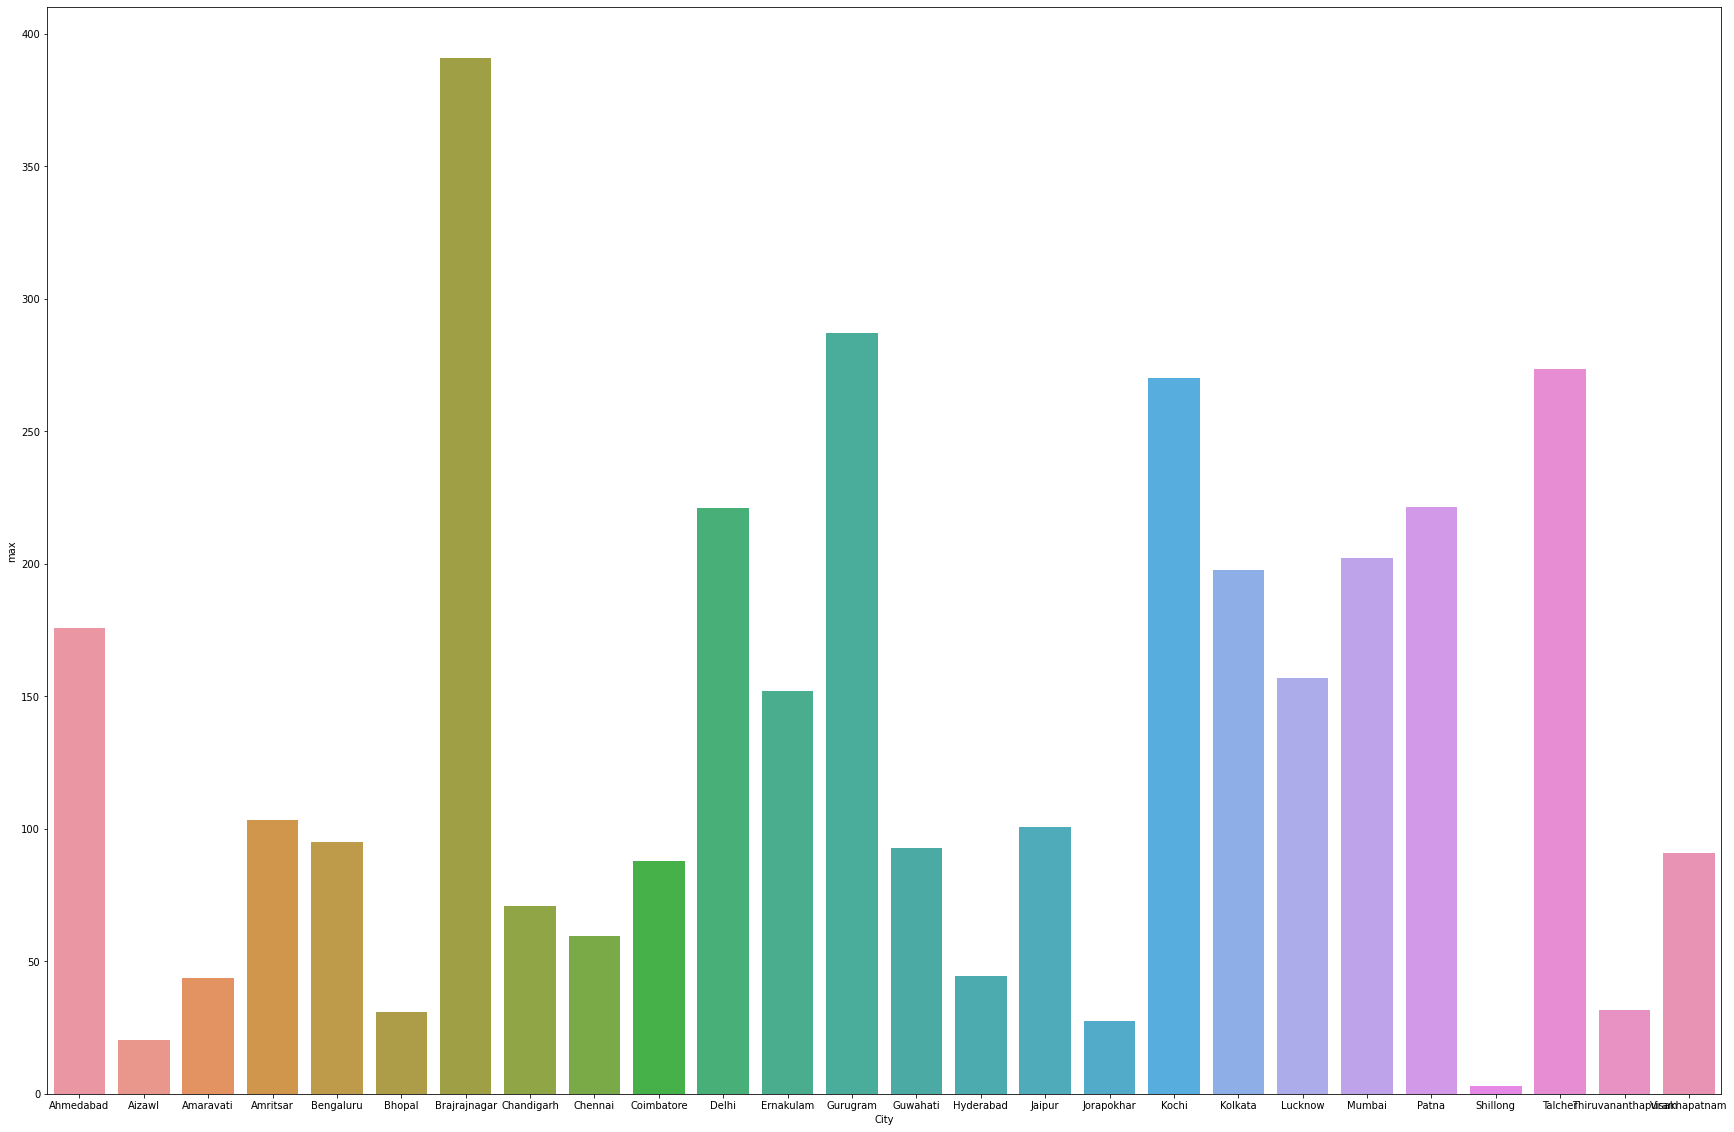

In [ ]:
plt.figure(figsize = (30,20))
sns.barplot(x = 'City' , y = 'max', data = df.groupby(['City']).NO.agg([min, max]).reset_index())

In [ ]:
df.groupby(['City']).AQI.agg(['mean']).reset_index()

,City,mean
0,Ahmedabad,372.322051
1,Aizawl,34.778761
2,Amaravati,93.662461
3,Amritsar,124.872236
4,Bengaluru,93.870582
5,Bhopal,131.608997
6,Brajrajnagar,158.122601
7,Chandigarh,96.187500
8,Chennai,124.070184
9,Coimbatore,74.937824


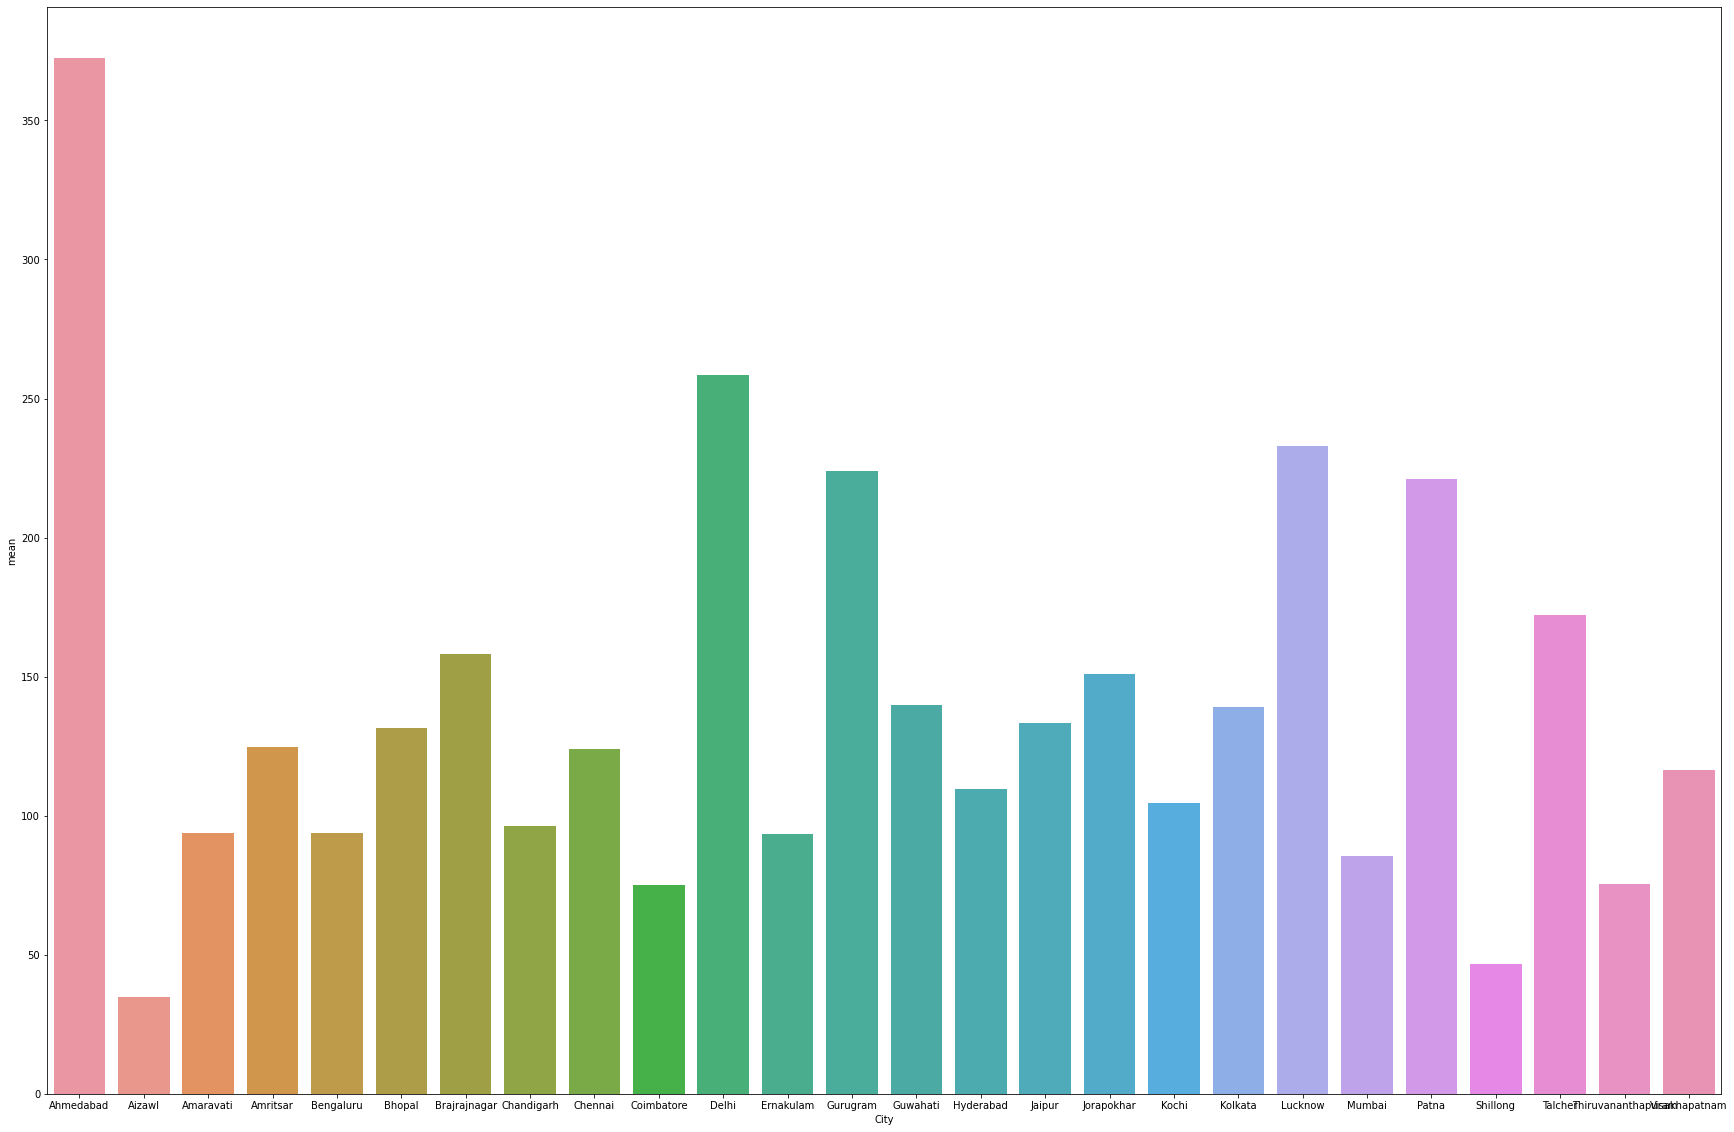

In [ ]:
plt.figure(figsize = (30,20))
sns.barplot(x = 'City' , y = 'mean', data = df.groupby(['City']).AQI.agg(['mean']).reset_index())

In [ ]:
# city of interest hyderabad
df = df[df["City"] == "Hyderabad"]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbb69f00a30>,
      dtype=object)

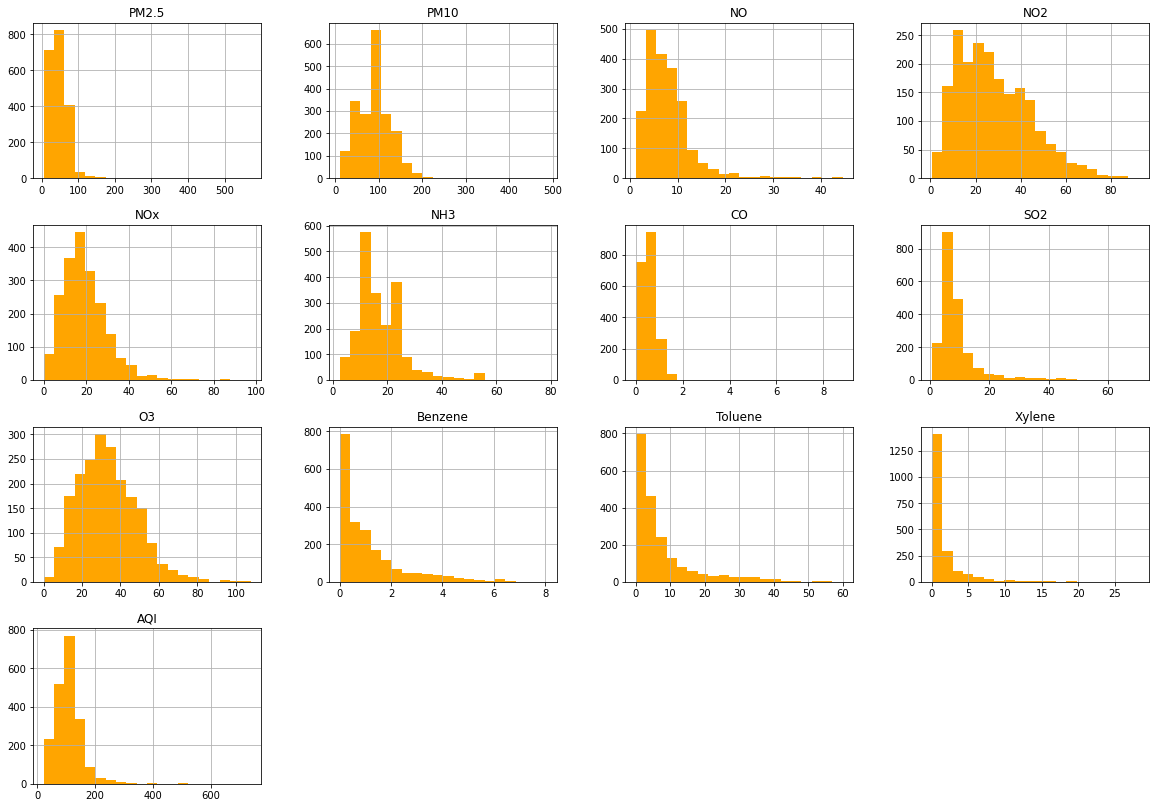

In [ ]:
df.hist(bins = 20, color = 'orange', figsize = (20, 14))

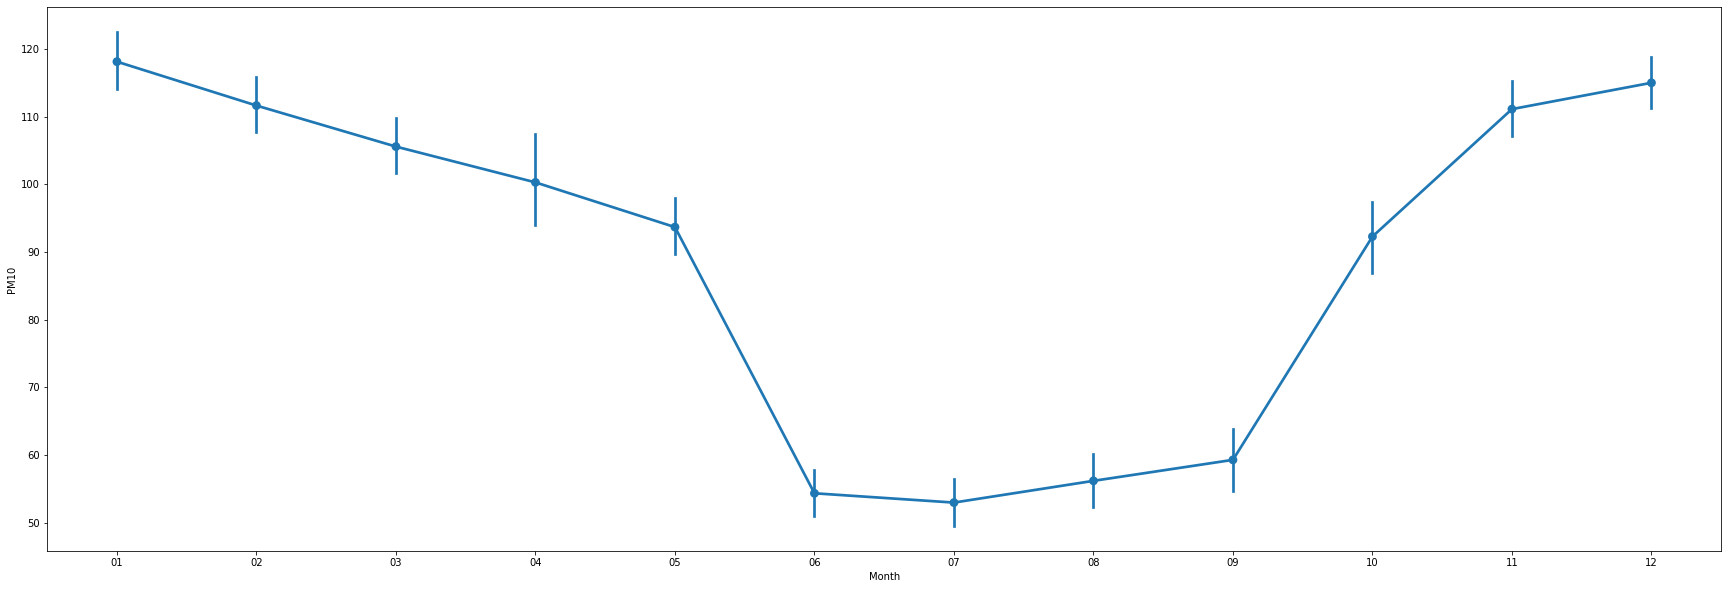

In [ ]:
plt.figure(figsize = (30,10))


sns.pointplot(x = 'Month', y = 'PM10', data = df)

In [ ]:
df.groupby(['year']).NO.agg(['mean']).reset_index()

,year,mean
0,2015,9.772845
1,2016,8.839781
2,2017,9.174658
3,2018,6.255068
4,2019,5.050192
5,2020,8.490874


In [ ]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,year,Month,day
14581,Hyderabad,2015-01-04,47.03,93.0,3.70,17.19,20.89,24.94,0.30,2.58,30.34,0.41,6.15,1.11,120.0,Moderate,2015,01,04
14582,Hyderabad,2015-01-05,47.03,93.0,3.61,9.69,13.30,24.94,0.23,5.19,31.28,0.39,7.22,0.55,120.0,Moderate,2015,01,05
14583,Hyderabad,2015-01-06,47.03,93.0,4.21,22.02,26.23,24.94,0.31,9.09,28.56,0.52,5.14,0.53,120.0,Moderate,2015,01,06
14584,Hyderabad,2015-01-07,47.03,93.0,26.08,40.08,66.15,24.94,0.53,9.03,31.08,1.92,16.35,2.14,120.0,Moderate,2015,01,07
14585,Hyderabad,2015-01-08,47.03,93.0,10.31,33.02,43.33,24.94,0.44,8.47,35.72,1.89,14.27,1.58,120.0,Moderate,2015,01,08


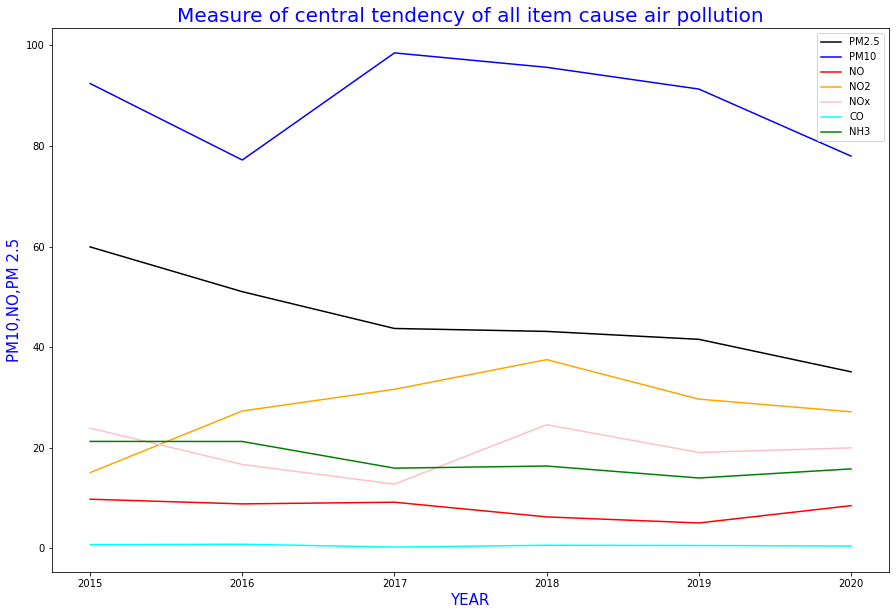

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(df["year"].unique(),df.groupby("year")['PM2.5'].agg(['mean']),color='black', label='PM2.5')
plt.plot(df["year"].unique(),df.groupby("year")['PM10'].agg(['mean']),color='blue', label='PM10')
plt.plot(df["year"].unique(),df.groupby("year")['NO'].agg(['mean']),color='red', label='NO')
plt.plot(df["year"].unique(),df.groupby("year")['NO2'].agg(['mean']),color='orange', label='NO2')
plt.plot(df["year"].unique(),df.groupby("year")['NOx'].agg(['mean']),color='pink', label='NOx')
plt.plot(df["year"].unique(),df.groupby("year")['CO'].agg(['mean']),color='cyan', label='CO')
plt.plot(df["year"].unique(),df.groupby("year")['NH3'].agg(['mean']),color='green', label='NH3')
plt.legend()

plt.xlabel('YEAR',fontsize = 15,color='blue')
plt.ylabel('PM10,NO,PM 2.5',fontsize = 15,color='blue')
plt.title('Measure of central tendency of all item cause air pollution',fontsize = 20,color='blue')
plt.show()

In [ ]:
data = df.drop(columns=["Date", "year", "Month", "day", "AQI_Bucket", "City"]).reset_index(drop=True)
x = data.drop(columns=["AQI"])
y = data["AQI"]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
model.score(x_train, y_train)*100

96.56422096810849

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
from math import sqrt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
rmse = sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"rmse: {rmse}, mae: {mae}, r2: {r2}")

rmse: 33.91888675365047, mae: 14.012437810945274, r2: 0.7291938631883325


In [ ]:
import pickle
pickle.dump(model, open('model.pkl','wb'))

In [ ]:
import pickle
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

df1 = {'PM2.5' : [47.03] ,'PM10' : [93.0],'NO' :[3.70],'NO2' : [17.19],'NOx' : [20.89],'NH3' : [24.94],'CO' : [0.30],'SO2' : [2.58],'O3' : [30.34],'Benzene' : [0.41],'Toluene' : [6.15],'Xylene' : [1.11]}
df2 = pd.DataFrame(data = df1)
model = pickle.load(open('model.pkl', 'rb'))
model.predict(df2)

array([119.64])

In [ ]:
import pickle
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

df1 = {'PM2.5' : 47.03 ,'PM10' : 93.0,'NO' :3.70,'NO2' : 17.19,'NOx' : 20.89,'NH3' : 24.94,'CO' : 0.30,'SO2' : 2.58,'O3' : 30.34,'Benzene' : 0.41,'Toluene' : 6.15,'Xylene' : 1.11}
df2 = pd.DataFrame(data = df1)
model = pickle.load(open('model.pkl', 'rb'))
model.predict(df2)

In [ ]:
import pickle
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

df1 = {'PM2.5' : [47.03] ,'PM10' : [93.0],'NO' :[3.70],'NO2' : [17.19],'NOx' : [20.89],'NH3' : [24.94],'CO' : [0.30],'SO2' : [2.58],'O3' : [30.34],'Benzene' : [0.41],'Toluene' : [6.15],'Xylene' : [1.11]}
df2 = pd.DataFrame(data = df1)
model = pickle.load(open('model.pkl', 'rb'))
model.predict(df2)[0]

119.64

In [ ]:
!pip freeze

absl-py==1.3.0
aeppl==0.0.33
aesara==2.7.9
aiohttp==3.8.3
aiosignal==1.3.1
alabaster==0.7.12
albumentations==1.2.1
altair==4.2.0
appdirs==1.4.4
arviz==0.12.1
astor==0.8.1
astropy==4.3.1
astunparse==1.6.3
async-timeout==4.0.2
atari-py==0.2.9
atomicwrites==1.4.1
attrs==22.1.0
audioread==3.0.0
autograd==1.5
Babel==2.11.0
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==5.0.1
blis==0.7.9
bokeh==2.3.3
branca==0.6.0
bs4==0.0.1
CacheControl==0.12.11
cachetools==5.2.0
catalogue==2.0.8
certifi==2022.9.24
cffi==1.15.1
cftime==1.6.2
chardet==3.0.4
charset-normalizer==2.1.1
click==7.1.2
clikit==0.6.2
cloudpickle==1.5.0
cmake==3.22.6
cmdstanpy==1.0.8
colorcet==3.0.1
colorlover==0.3.0
community==1.0.0b1
confection==0.0.3
cons==0.4.5
contextlib2==0.5.5
convertdate==2.4.0
crashtest==0.3.1
crcmod==1.7
cufflinks==0.17.3
cvxopt==1.3.0
cvxpy==1.2.2
cycler==0.11.0
cymem==2.0.7
Cython==0.29.32
daft==0.0.4
dask==2022.2.1
datascience==0.17.5
db-dtypes==1.0.4
debugpy==1.0.0
decorator==4.4.2
defusedxml==0.7.1
desc